In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_excel("sample_data/wahana.xlsx")
data


,id,pelayanan,wahana
0,1,11,4
1,2,2,4
2,3,44,5
3,4,14,2
4,5,50,10
...,...,...,...
95,96,96,2
96,97,2,3
97,98,84,9
98,99,50,8


In [17]:
def wahanajelek(f):
    wahanajelek, notwahanajelek = 4, 6

    if f <= wahanajelek:
        return 1
    elif f > notwahanajelek:
        return 0
    elif f > wahanajelek and f <= notwahanajelek:
        return ((notwahanajelek - f) / (notwahanajelek - wahanajelek))


def wahanabagus(f):
    notwahanabagus1, wahanabagus1, wahanabagus2, notwahanabagus2 = 4, 6, 7, 9

    if f > wahanabagus1 and f <= wahanabagus2:
        return 1
    elif f <= notwahanabagus1 or f > notwahanabagus2:
        return 0
    elif f > notwahanabagus1 and f <= wahanabagus1:
        return ((f - notwahanabagus1) / (wahanabagus1 - notwahanabagus1))
    elif f > wahanabagus2 and f <= notwahanabagus2:
        return ((notwahanabagus2 - f) / (notwahanabagus2 - wahanabagus2))


def wahanaluarbiasa(f):
    notwahanaluarbiasa, wahanaluarbiasa = 6, 8

    if f > wahanaluarbiasa:
        return 1
    elif f <= notwahanaluarbiasa:
        return 0
    elif f > notwahanaluarbiasa and f <= wahanaluarbiasa:
        return ((f - notwahanaluarbiasa) / (wahanaluarbiasa - notwahanaluarbiasa))

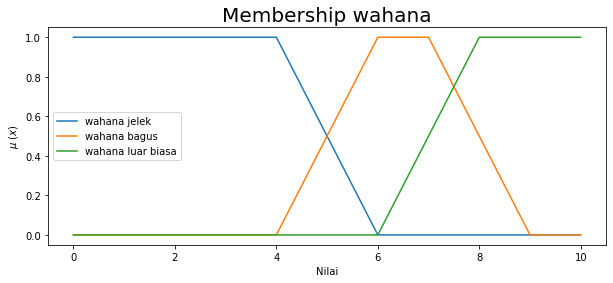

In [18]:
# plot grafik membership wahana

x = [i for i in range(11)]

ypoorw = [wahanajelek(i) for i in x]
ygoodw = [wahanabagus(i) for i in x]
yexcellentw = [wahanaluarbiasa(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership wahana',fontsize = 20) 
plt.plot(x, ypoorw, label = 'wahana jelek')
plt.plot(x, ygoodw, label = 'wahana bagus')
plt.plot(x, yexcellentw, label = 'wahana luar biasa')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [19]:
def pelayananjelek(x):
  pelayananjelek = 50
  notpelayananjelek = 67

  if x <= pelayananjelek:
    return 1;
  elif x > notpelayananjelek:
    return 0
  elif x > pelayananjelek and x <= notpelayananjelek:
    return (notpelayananjelek - x) / (notpelayananjelek - pelayananjelek)

def pelayananbagus(x):
  notpelayananbagus1 = 50
  pelayananbagus1 = 60
  pelayananbagus2 = 70
  notpelayananbagus2 = 85

  if x > pelayananbagus1 and x <= pelayananbagus2:
    return 1
  elif x <= notpelayananbagus1 or x > notpelayananbagus2:
    return 0
  elif x > notpelayananbagus1 and x <= pelayananbagus1:
    return (x - notpelayananbagus1) / (pelayananbagus1 - notpelayananbagus1)
  elif x > pelayananbagus2 and x <= notpelayananbagus2:
    return (notpelayananbagus2 - x) / (notpelayananbagus2 - pelayananbagus2)

def pelayananluarbiasa(x):
  notpelayananluarbiasa = 75
  pelayananluarbiasa = 80

  if x > pelayananluarbiasa:
    return 1
  elif x <= notpelayananluarbiasa:
    return 0
  elif x > notpelayananluarbiasa and x <= pelayananluarbiasa:
    return (x - notpelayananluarbiasa) / (pelayananluarbiasa - notpelayananluarbiasa)

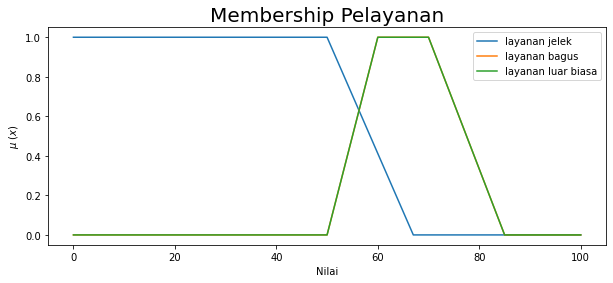

In [20]:
# plot grafik membership pelayanan

x = [i for i in range(101)]

ypoorS = [pelayananjelek(i) for i in x]
ygoodS = [pelayananbagus(i) for i in x]
yexcellentS = [pelayananbagus(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership Pelayanan',fontsize = 20) 
plt.plot(x, ypoorS, label = 'layanan jelek')
plt.plot(x, ygoodS, label = 'layanan bagus')
plt.plot(x, yexcellentS, label = 'layanan luar biasa')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [21]:
def fuzzificationwahana(wahanaValue):
  wahanaset = []
  wahanaset.append(wahanajelek(wahanaValue))
  wahanaset.append(wahanabagus(wahanaValue))
  wahanaset.append(wahanaluarbiasa(wahanaValue))
  return wahanaset

def fuzzificationpelayanan(pelayananValue):
  pelayananSet = []
  pelayananSet.append(pelayananjelek(pelayananValue))
  pelayananSet.append(pelayananbagus(pelayananValue))
  pelayananSet.append(pelayananbagus(pelayananValue))
  return pelayananSet

In [22]:
def inference(pelayananSet, wahanaset):
  inferenceSet = []
  recommendedSet, moderatelySet, notRecommendedSet = [], [], []

  recommendedSet.append(min(wahanaset[2], pelayananSet[2]))
  recommendedSet.append(min(wahanaset[2], pelayananSet[1]))
  recommendedSet.append(min(wahanaset[1], pelayananSet[2]))
  

  moderatelySet.append(min(wahanaset[1], pelayananSet[1]))
  moderatelySet.append(min(wahanaset[2], pelayananSet[0]))

  notRecommendedSet.append(min(wahanaset[0], pelayananSet[0]))
  notRecommendedSet.append(min(wahanaset[1], pelayananSet[0]))
  notRecommendedSet.append(min(wahanaset[0], pelayananSet[1]))
  notRecommendedSet.append(min(wahanaset[0], pelayananSet[2]))

  inferenceSet.append(max(recommendedSet))
  inferenceSet.append(max(moderatelySet))
  inferenceSet.append(max(notRecommendedSet))
  
  return inferenceSet

In [23]:

def defuzzification(inferenceSet):
  multiplier = (inferenceSet[0]*100) + (inferenceSet[1]*80) + (inferenceSet[2]*50) 
  divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2]
  if divider != 0:
    return multiplier / divider
  else:
   return multiplier
  

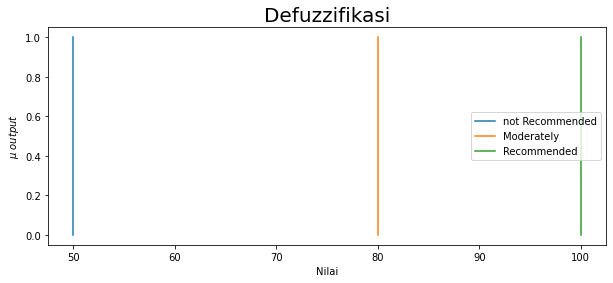

In [24]:
xnotRecommended = [50,50]
xmoderately = [80,80]
xRecommended = [100,100]

y = [0,1]

plt.figure(figsize=(10,4))
plt.title('Defuzzifikasi',fontsize = 20)
plt.plot(xnotRecommended,y,label='not Recommended')
plt.plot(xmoderately,y,label='Moderately')
plt.plot(xRecommended,y,label='Recommended')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ output$')
plt.legend()

In [25]:
hasilAkhir = []
for row in range(100):
  fuzzipelayanan = fuzzificationpelayanan(data['pelayanan'][row])
  fuzziWahana = fuzzificationwahana(data['wahana'][row])
  inferensi = inference(fuzzipelayanan,fuzziWahana)
  hasilAkhir.extend([defuzzification(inferensi)])
 
data['hasil'] = hasilAkhir
data = data.sort_values(by='hasil', ascending=False)[:10]
data['id'].to_excel('peringkat.xls', index=False, header=False)

data

,id,pelayanan,wahana,hasil
97,98,84,9,100.000000
41,42,75,9,100.000000
72,73,65,10,97.894737
78,79,61,10,94.782609
47,48,59,10,93.133047
52,53,81,8,90.000000
90,91,8,10,80.000000
4,5,50,10,80.000000
32,33,39,10,80.000000
14,15,48,9,80.000000
